# Import the libraries

In [1]:
###### Import the libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from os import system
import graphviz
from pmdarima import auto_arima

import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


from PIL import Image
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

# Load the data into data frame

In [2]:
input_data1 = pd.read_csv("C:\\Users\\poonam\\Desktop\\FIU\\2020 Spring\\Data Mining\\Project\\Chicago Crime\\Crimes_-_2001_to_present.csv",index_col='Date')

print(type(input_data1))

<class 'pandas.core.frame.DataFrame'>


In [3]:
input_data1[input_data1['Primary Type'].isin(['HOMICIDE'])]['Primary Type'][:5]

Date
05/20/2003 03:15:00 AM    HOMICIDE
07/29/2001 10:15:00 AM    HOMICIDE
01/11/2019 10:30:00 PM    HOMICIDE
05/27/2019 11:42:00 PM    HOMICIDE
05/28/2019 12:25:00 AM    HOMICIDE
Name: Primary Type, dtype: object

In [4]:
input_data1.index

Index(['01/01/2001 11:00:00 AM', '10/08/2017 03:00:00 AM',
       '03/28/2017 02:00:00 PM', '09/09/2017 08:17:00 PM',
       '08/26/2017 10:00:00 AM', '02/10/2013 12:00:00 AM',
       '01/01/2015 12:01:00 AM', '01/01/2017 12:01:00 AM',
       '07/17/2017 10:10:00 AM', '12/28/2017 03:55:00 PM',
       ...
       '03/18/2015 07:55:00 PM', '03/18/2015 04:00:00 AM',
       '03/18/2015 05:08:00 PM', '05/26/2019 12:10:00 AM',
       '05/26/2019 11:29:00 AM', '05/26/2019 05:13:00 PM',
       '05/26/2019 06:48:00 AM', '05/26/2019 02:11:00 AM',
       '07/01/2014 07:30:00 AM', '11/30/2017 09:00:00 AM'],
      dtype='object', name='Date', length=7105809)

In [5]:
input_data1.index = pd.to_datetime(input_data1.index)

In [6]:
HC = pd.DataFrame(input_data1[input_data1['Primary Type'].isin(['HOMICIDE'])]['Primary Type'])
HC.head(10)

,Primary Type
Date,
2003-05-20 03:15:00,HOMICIDE
2001-07-29 10:15:00,HOMICIDE
2019-01-11 22:30:00,HOMICIDE
2019-05-27 23:42:00,HOMICIDE
2019-05-28 00:25:00,HOMICIDE
2019-05-28 09:25:00,HOMICIDE
2019-05-29 14:24:00,HOMICIDE
2019-05-29 11:42:00,HOMICIDE
2019-05-29 02:29:00,HOMICIDE


In [7]:
dates = pd.date_range('20070101',periods=18250)
df = pd.DataFrame(np.random.randn(18250), columns = list ('A'))
df['date'] = dates
df = df[['date','A']]
df.head()

,date,A
0,2007-01-01,0.688245
1,2007-01-02,-0.053999
2,2007-01-03,-0.276765
3,2007-01-04,-1.549878
4,2007-01-05,-1.251505


In [8]:
#input_data1[:5]

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 11:00:00,11034701,JA366925,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
2017-10-08 03:00:00,11227287,JB147188,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-03-28 14:00:00,11227583,JB147595,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-09-09 20:17:00,11227293,JB147230,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2017-08-26 10:00:00,11227634,JB147599,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [9]:
###### add the new column month 
input_data1['mon']= pd.DatetimeIndex(input_data1.index).month
#df['month'] = pd.DatetimeIndex(df['birth_date']).month

In [10]:
#input_data1[:5]

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,mon
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 11:00:00,11034701,JA366925,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,...,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN,1
2017-10-08 03:00:00,11227287,JB147188,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,...,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,10
2017-03-28 14:00:00,11227583,JB147595,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,...,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,3
2017-09-09 20:17:00,11227293,JB147230,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,...,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,9
2017-08-26 10:00:00,11227634,JB147599,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,...,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,8


In [11]:
###### add new column season, used the date column to specify the seasons associated with it. 
def get_season(row):
    if row >= 3 and  row <= 5:
        return '1'
    elif row >= 6 and  row <= 8:
        return '2'
    elif row >= 9 and row <= 11:
        return '3'
    else:
        return '4'

input_data1['Season'] = input_data1['mon'].apply(get_season)

In [12]:
#input_data1.tail(100)
#input_data1['Season'].dtype

In [13]:
###### to see the dataset with added column month and season
input_data1.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,mon,Season
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01 11:00:00,11034701,JA366925,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,412,...,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN,1,4
2017-10-08 03:00:00,11227287,JB147188,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,2222,...,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,10,3
2017-03-28 14:00:00,11227583,JB147595,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,835,...,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,3,1
2017-09-09 20:17:00,11227293,JB147230,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,313,...,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,9,3
2017-08-26 10:00:00,11227634,JB147599,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,122,...,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN,8,2


In [14]:
###### to load the data into new dataframe based on Primary type and season
df1 = input_data1[['Primary Type', 'Season']]

In [15]:
#####################no need of this ######################################################
#df1['Season'].groupby(df1['Primary Type']).sum()

In [16]:
df1['Count'] = input_data1.groupby(['Primary Type'])['Season'].transform('count')
df1.drop_duplicates()[:5]

,Primary Type,Season,Count
Date,,,
2001-01-01 11:00:00,DECEPTIVE PRACTICE,4,290147
2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,3,28940
2017-03-28 14:00:00,BURGLARY,1,401330
2017-09-09 20:17:00,THEFT,3,1502991
2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,2,28940


In [17]:
df1.head()

,Primary Type,Season,Count
Date,,,
2001-01-01 11:00:00,DECEPTIVE PRACTICE,4,290147
2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,3,28940
2017-03-28 14:00:00,BURGLARY,1,401330
2017-09-09 20:17:00,THEFT,3,1502991
2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,2,28940


In [18]:
df = input_data1.groupby(['Primary Type','Season']).count()

In [19]:
df.head()

ID  Case Number   Block    IUCR  Description  \
Primary Type Season                                                     
ARSON        1         3091         3091    3091    3091         3091   
             2         3310         3310    3310    3310         3310   
             3         2860         2860    2860    2860         2860   
             4         2413         2413    2413    2413         2413   
ASSAULT      1       120077       120077  120077  120077       120077   

                     Location Description  Arrest  Domestic    Beat  District  \
Primary Type Season                                                             
ARSON        1                       3091    3091      3091    3091      3091   
             2                       3310    3310      3310    3310      3310   
             3                       2860    2860      2860    2860      2860   
             4                       2412    2413      2413    2413      2413   
ASSAULT      1                     120077  120077    120077  120077    120077   

                     ...  Community Area  FBI Code  X Coordinate  \
Primary Type Season  ...                                           
ARSON        1       ...            2683      3091          3079   
             2       ...            3013      3310          3294   
             3       ...            2623      2860          2824   
             4       ...            2039      2413          2398   
ASSAULT      1       ...          107372    120077        119513   

                     Y Coordinate    Year  Updated On  Latitude  Longitude  \
Primary Type Season                                                          
ARSON        1               3079    3091        3091      3079       3079   
             2               3294    3310        3310      3294       3294   
             3               2824    2860        2860      2824       2824   
             4               2398    2413        2413      2398       2398   
ASSAULT      1             119513  120077      120077    119513     119513   

                     Location     mon  
Primary Type Season                    
ARSON        1           3079    3091  
             2           3294    3310  
             3           2824    2860  
             4           2398    2413  
ASSAULT      1         119513  120077  

[5 rows x 21 columns]

In [20]:
#df1.columns

# Time series Analysis

In [21]:
# we used the 'theft' from primary type to do the prediction about future crime 
theft = df1.loc[df1['Primary Type'] =='THEFT']

In [22]:
theft.head()

,Primary Type,Season,Count
Date,,,
2017-09-09 20:17:00,THEFT,3,1502991
2017-07-17 10:10:00,THEFT,2,1502991
2017-07-29 15:40:00,THEFT,2,1502991
2017-07-29 10:00:00,THEFT,2,1502991
2017-07-27 01:00:00,THEFT,2,1502991


In [23]:
grouper = theft.groupby([pd.TimeGrouper('M'), 'Primary Type'])

In [24]:
#grouper.head()

In [25]:
data = grouper['Primary Type'].count().unstack()
#data.tail(50)

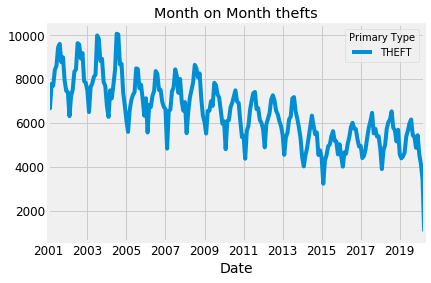

In [26]:
import matplotlib.pyplot as plt
data.plot()
plt.title("Month on Month thefts")
plt.show()

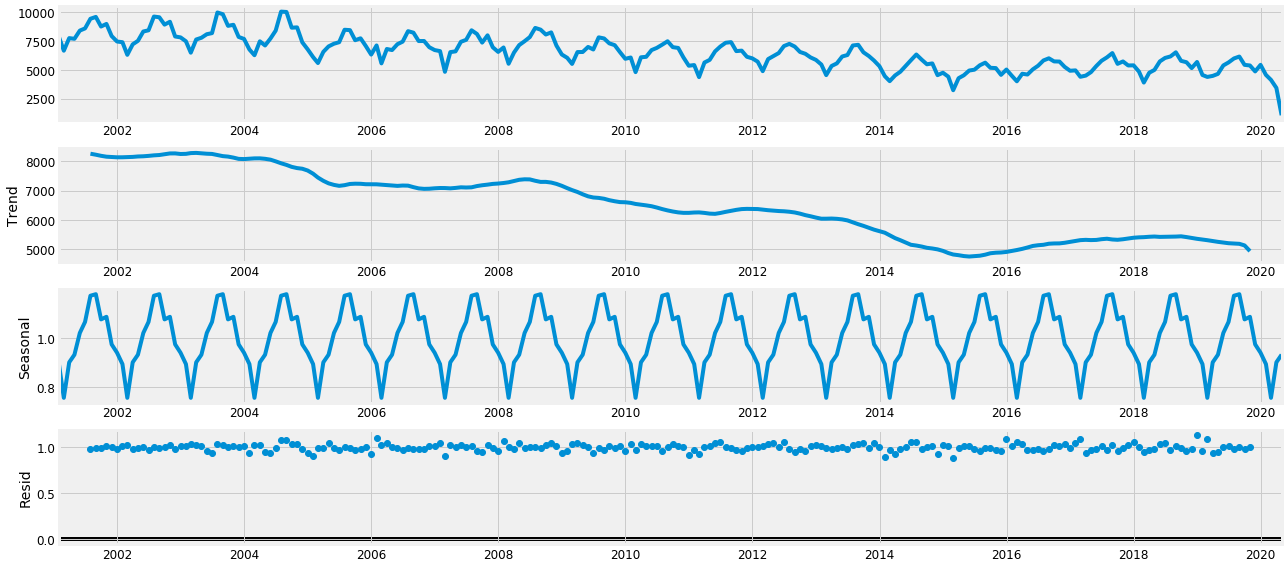

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(data, model='multiplicative')
fig = decomposition.plot()
plt.show()
fig.savefig('decomposition.png', dpi=fig.dpi)

In [28]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [29]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4722.9855193770745
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4309.558673441667
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3377.401857298728
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3202.557512155608
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3361.189574181609
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3348.7664679466934
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3217.2976861638367
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3204.301677839823
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4539.62751206435
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4262.491821446258
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3290.3085842957817
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3117.451366059606
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3300.196814180585
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3270.4553566957625
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3147.196395507958
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3118.788121496339
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3647.4832894502297
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3346.1640844081276
ARIM

In [30]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4439      0.218      2.040      0.041       0.017       0.870
ma.L1         -0.7505      0.191     -3.921      0.000      -1.126      -0.375
ma.S.L12      -0.6106      0.072     -8.536      0.000      -0.751      -0.470
sigma2       1.37e+05   8381.138     16.346      0.000    1.21e+05    1.53e+05


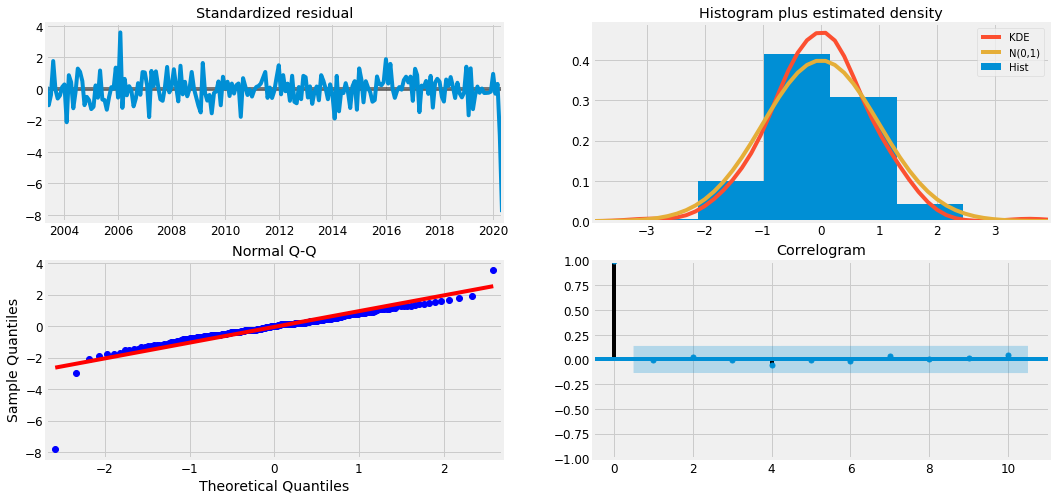

In [31]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()
fig.savefig('diagnostics.png', dpi=fig.dpi)

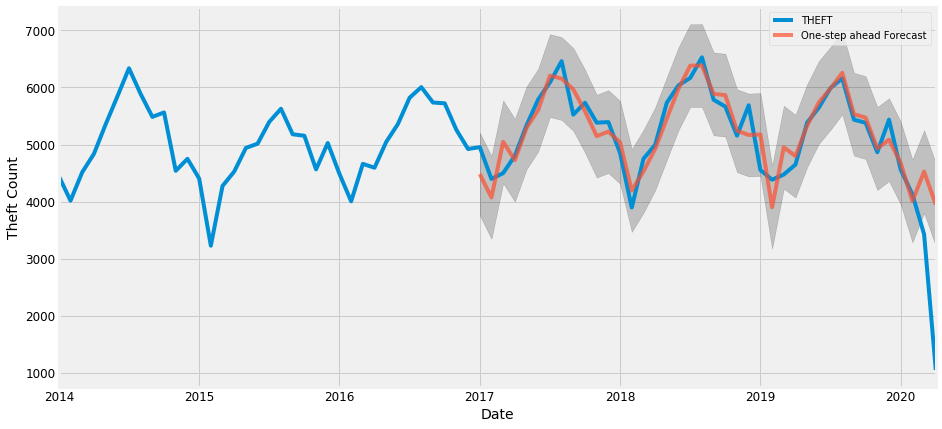

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = data['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Theft Count')
plt.legend()

plt.show()

fig.savefig('predictive.png', dpi=fig.dpi)

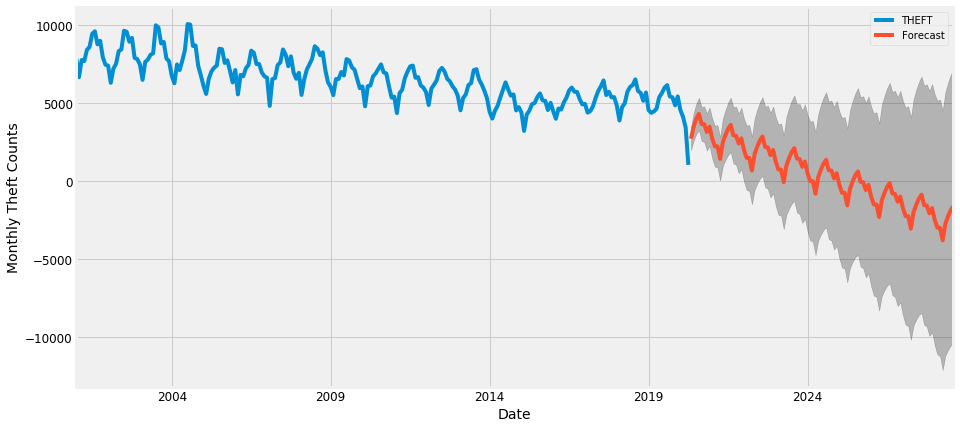

In [33]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Theft Counts')

plt.legend()
plt.show()
fig.savefig('forecast.png', dpi=fig.dpi)

# Trends of Arrests

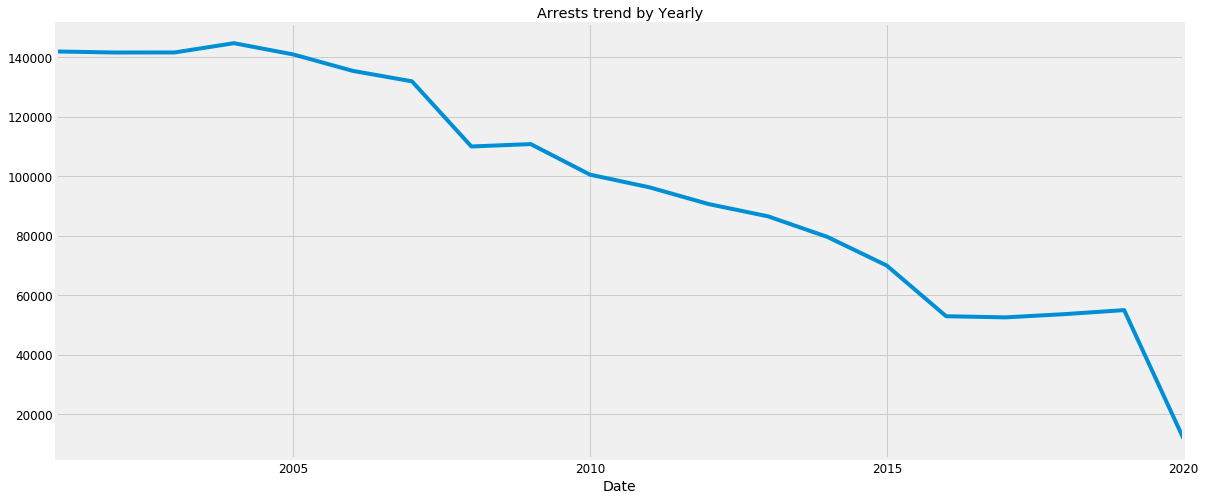

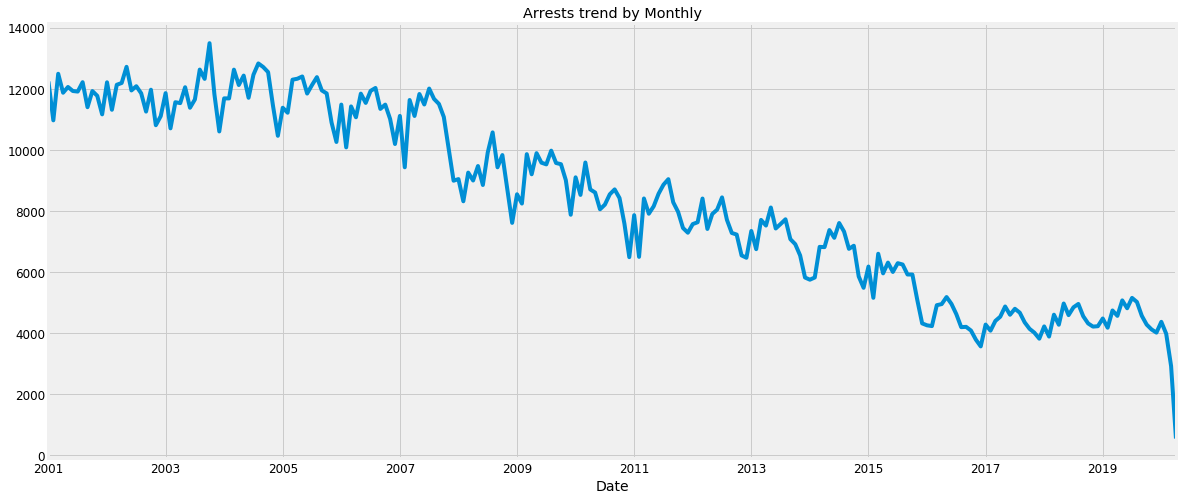

In [34]:
arrest_count_yearly = input_data1[input_data1['Arrest'] == True]['Arrest']
arrest_count_yearly

# Get Yearly arrest trend
arrest_count_yearly.resample('A').sum().plot()
plt.title('Arrests trend by Yearly')
plt.show()
# Get Monthly arrest trend
arrest_count_yearly.resample('M').sum().plot()
plt.title('Arrests trend by Monthly')
plt.show()

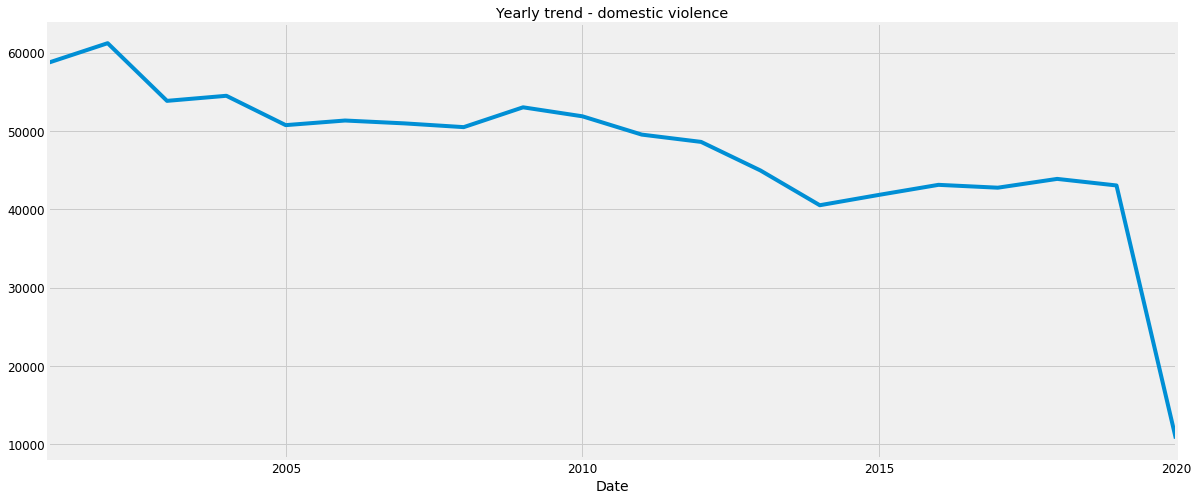

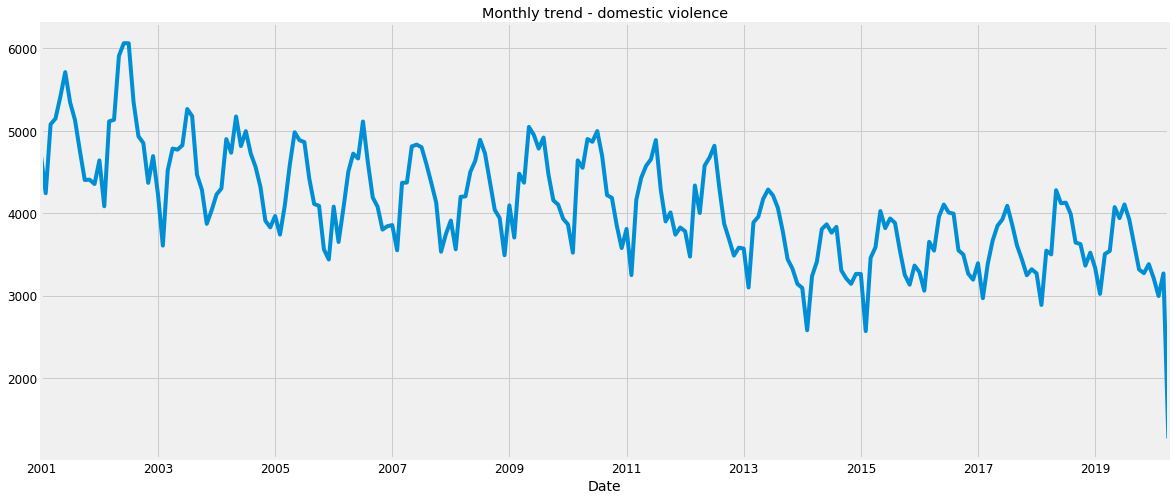

In [35]:
domestic_crime_yearly = input_data1[input_data1['Domestic'] == True]['Domestic']
plt.subplot()
# Yearly trend - domestic violence
domestic_crime_yearly.resample('A').sum().plot()
plt.title('Yearly trend - domestic violence')
plt.show()
# Monthly trend - domestic violence
domestic_crime_yearly.resample('M').sum().plot()
plt.title('Monthly trend - domestic violence')
plt.show()


# Crime by season

In [36]:
df1.head()

,Primary Type,Season,Count
Date,,,
2001-01-01 11:00:00,DECEPTIVE PRACTICE,4,290147
2017-10-08 03:00:00,CRIM SEXUAL ASSAULT,3,28940
2017-03-28 14:00:00,BURGLARY,1,401330
2017-09-09 20:17:00,THEFT,3,1502991
2017-08-26 10:00:00,CRIM SEXUAL ASSAULT,2,28940


In [37]:
#df1.columns

In [38]:
#groupby(['Season'])
df2=df1.groupby(['Primary Type','Season']).count()
df2.head()

Count
Primary Type Season        
ARSON        1         3091
             2         3310
             3         2860
             4         2413
ASSAULT      1       120077

In [39]:
df3=df2.unstack()

In [40]:
df3.head()

Count                              
Season                                    1         2         3         4
Primary Type                                                             
ARSON                                3091.0    3310.0    2860.0    2413.0
ASSAULT                            120077.0  124461.0  109258.0   92767.0
BATTERY                            346581.0  366403.0  313223.0  273487.0
BURGLARY                            92836.0  109558.0  108914.0   90022.0
CONCEALED CARRY LICENSE VIOLATION     140.0     148.0     152.0     120.0

In [41]:
df3.transpose()

Primary Type   ARSON   ASSAULT   BATTERY  BURGLARY  \
      Season                                         
Count 1       3091.0  120077.0  346581.0   92836.0   
      2       3310.0  124461.0  366403.0  109558.0   
      3       2860.0  109258.0  313223.0  108914.0   
      4       2413.0   92767.0  273487.0   90022.0   

Primary Type  CONCEALED CARRY LICENSE VIOLATION  CRIM SEXUAL ASSAULT  \
      Season                                                           
Count 1                                   140.0               6949.0   
      2                                   148.0               8166.0   
      3                                   152.0               7187.0   
      4                                   120.0               6638.0   

Primary Type  CRIMINAL DAMAGE  CRIMINAL SEXUAL ASSAULT  CRIMINAL TRESPASS  \
      Season                                                                
Count 1              210873.0                    219.0            52506.0   
      2              221965.0                    109.0            51139.0   
      3              206334.0                     84.0            49969.0   
      4              168725.0                    257.0            49043.0   

Primary Type  DECEPTIVE PRACTICE  ...  OTHER OFFENSE  PROSTITUTION  \
      Season                      ...                                
Count 1                  73013.0  ...       117878.0       18160.0   
      2                  73476.0  ...       112424.0       17551.0   
      3                  71137.0  ...       102955.0       17181.0   
      4                  72521.0  ...       108494.0       16288.0   

Primary Type  PUBLIC INDECENCY  PUBLIC PEACE VIOLATION  RITUALISM  ROBBERY  \
      Season                                                                 
Count 1                   41.0                 13731.0        5.0  60669.0   
      2                   56.0                 13393.0        4.0  72701.0   
      3                   48.0                 12862.0        7.0  72088.0   
      4                   33.0                  9803.0        7.0  61556.0   

Primary Type  SEX OFFENSE  STALKING     THEFT  WEAPONS VIOLATION  
      Season                                                      
Count 1            6694.0     963.0  360949.0            20676.0  
      2            7860.0     970.0  423350.0            21376.0  
      3            6477.0     910.0  386468.0            19797.0  
      4            5967.0     839.0  332224.0            17510.0  

[4 rows x 36 columns]

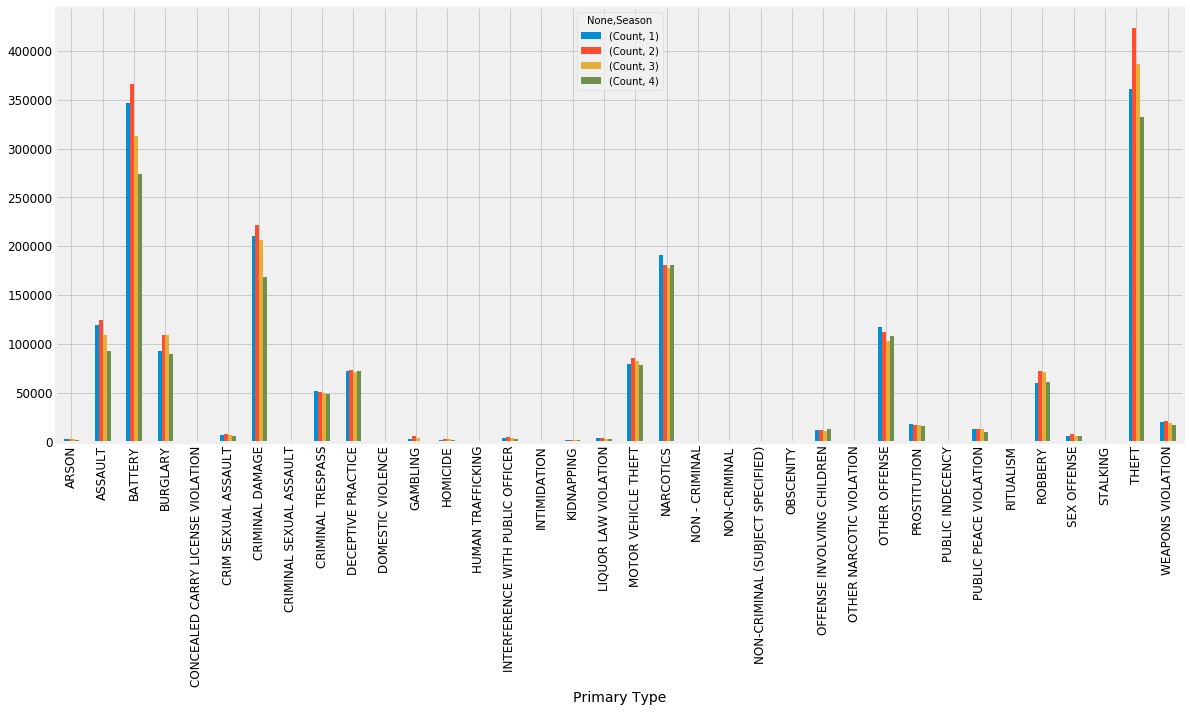

In [42]:
df3.plot.bar()

# Most frequent crime type

In [43]:
crime_type=" ".join(crime for crime in input_data1["Primary Type"])

In [44]:
crime_code_wordcloud=WordCloud(collocations = False,background_color="white").generate(crime_type)

<function matplotlib.pyplot.show(*args, **kw)>

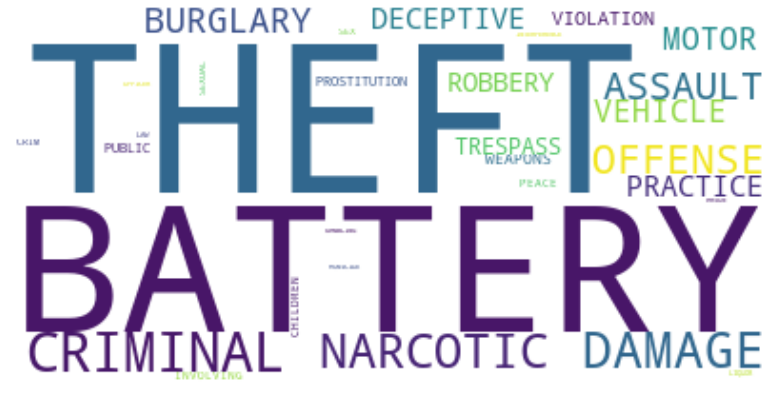

In [45]:
plt.figure(figsize=[14,7])
plt.imshow(crime_code_wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show

In [46]:
crime_type1=" ".join(crime for crime in input_data1["IUCR"])

In [47]:
crime_code_wordcloud1=WordCloud(collocations = False,background_color="white").generate(crime_type1)

<function matplotlib.pyplot.show(*args, **kw)>

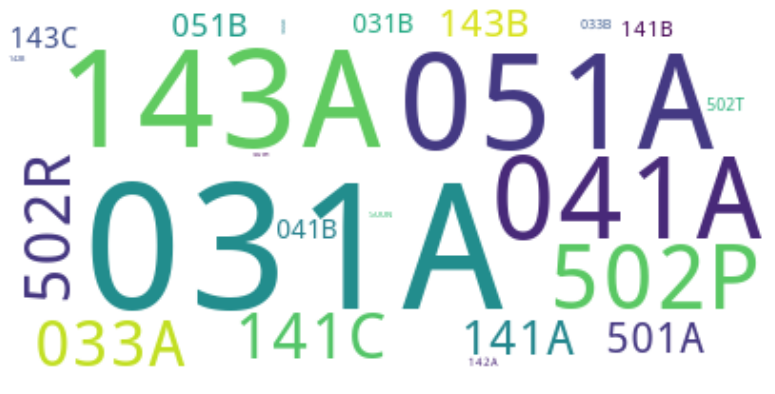

In [48]:
plt.figure(figsize=[14,7])
plt.imshow(crime_code_wordcloud1,interpolation="bilinear")
plt.axis("off")
plt.show

# Trend of crime by type over time(2001-2020)

In [49]:
overall_crime=input_data1.pivot_table("ID",aggfunc=np.size, columns="Primary Type", index=input_data1.index.date,fill_value=0)

In [50]:
overall_crime[:5]

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
2001-01-01,0,70,296,66,0,38,233,2,29,92,...,167,5,0,5,0,41,66,1,413,32
2001-01-02,0,66,143,68,0,2,118,0,35,78,...,101,11,0,2,0,35,4,0,221,9
2001-01-03,1,79,165,57,0,7,136,0,35,49,...,96,16,0,7,0,51,5,1,226,7
2001-01-04,1,57,173,55,0,2,133,0,29,42,...,96,19,0,3,0,55,1,0,243,9
2001-01-05,3,68,178,55,0,6,142,0,29,53,...,90,16,0,5,0,55,2,0,265,6


In [51]:
overall_crime.index=pd.DatetimeIndex(overall_crime.index)

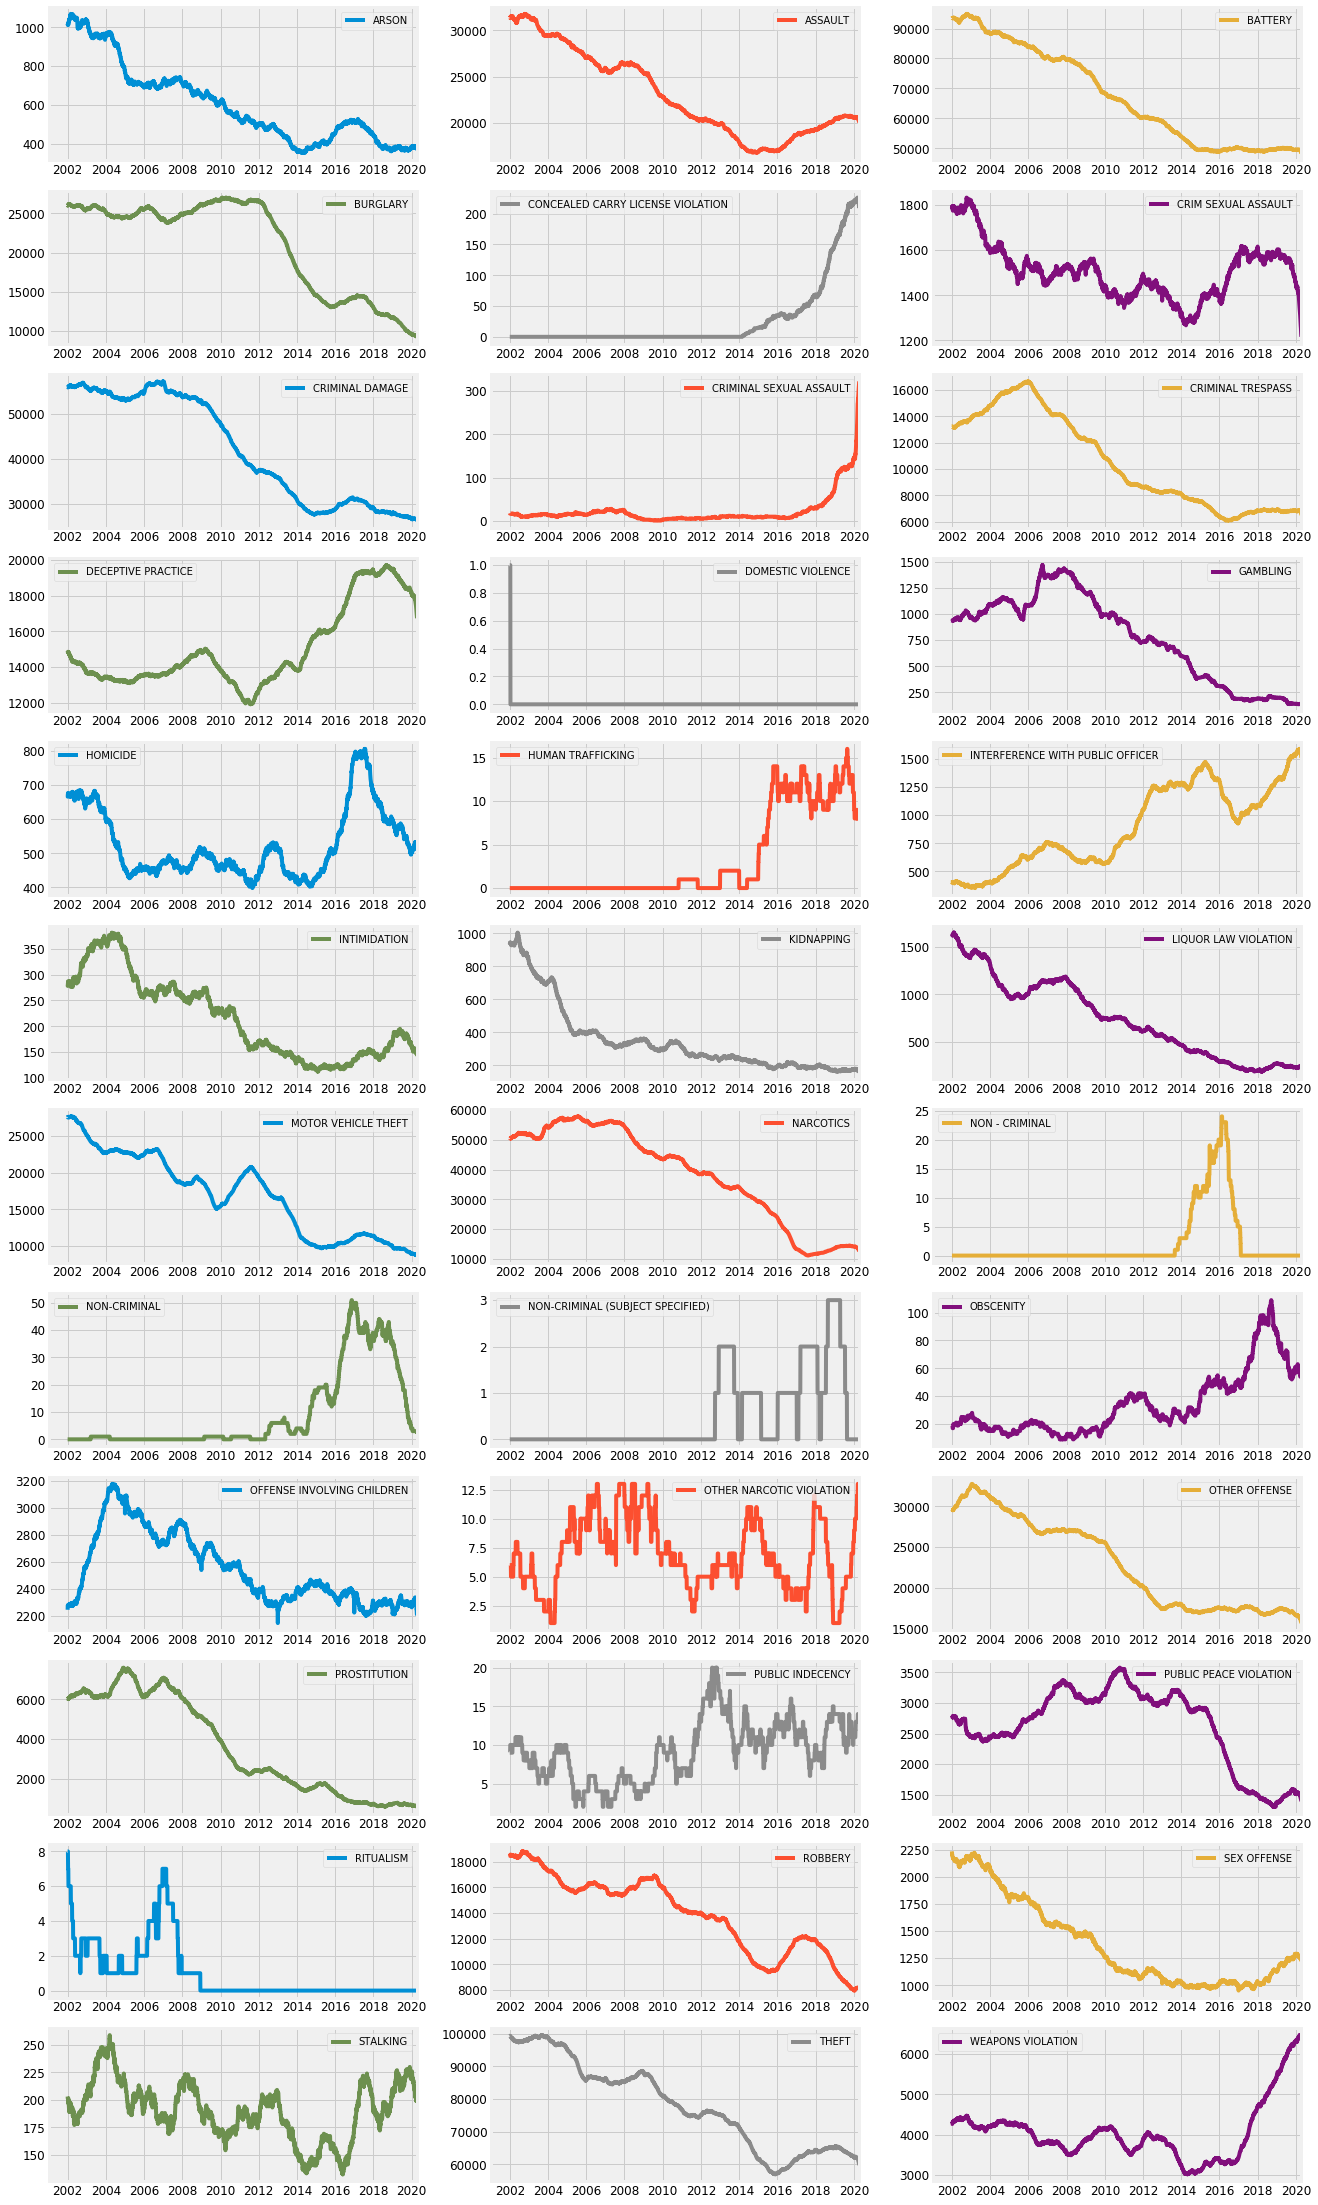

In [52]:
plot = overall_crime.rolling(365).sum().plot(subplots=True,layout=(-1,3),figsize=(20,40),sharex=False,sharey=False)